# Iris Flower Dataset Example

In [1]:
# Library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

import time

### Load Dataset and Analyse it

In [2]:
iris = sklearn.datasets.load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


#### Load dataset into Pandas DataFrame

In [7]:
iris_df = pd.DataFrame(iris.data, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
iris_df_labels = iris_df.copy()
iris_df_labels['Label'] = iris.target_names[iris.target]
iris_df_labels.head()

,Sepal length,Sepal width,Petal length,Petal width,Label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris_df_labels.tail()

,Sepal length,Sepal width,Petal length,Petal width,Label
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
iris_df_labels.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualize Dataset using Scatter Plots

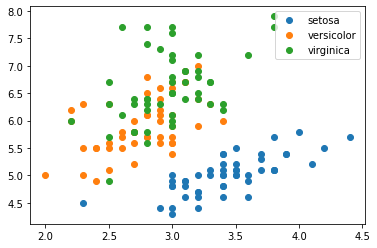

In [10]:
groups = iris_df_labels.groupby("Label")
for name, group in groups:
    plt.plot(group["Sepal width"], group["Sepal length"], marker="o", linestyle="", label=name)
plt.legend()

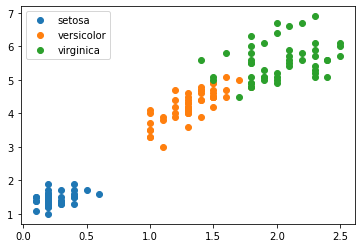

In [11]:
for name, group in groups:
    plt.plot(group["Petal width"], group["Petal length"], marker="o", linestyle="", label=name)
plt.legend()

### Split Dataset into Training and Test

In [12]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(iris.data, iris.target, train_size=0.80)

In [13]:
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (120, 4), y_train: (120,)
X_test: (30, 4), y_test: (30,)


#### Standardization of Data

> Zero mean and Unit Variance

In [15]:
def scale_data(scaling):
    if scaling:
        print("------------------Scaling the data------------------")
        scaler = preprocessing.StandardScaler().fit(X_train)
        Scaled_X_train = scaler.transform(X_train)
        Scaled_X_test = scaler.transform(X_test)
    else:
        print("------------------Not scaling the data------------------")
        Scaled_X_train = X_train
        Scaled_X_test = X_test
    return Scaled_X_train, Scaled_X_test

Scaled_X_train, Scaled_X_test = scale_data(False)
print(f'\nThe first data sample Original Form:\n\n {Scaled_X_train[1]}')

------------------Not scaling the data------------------

The first data sample Original Form:

 [6.  2.2 5.  1.5]


### Training a Decision Tree Classifier on Original Data - Cross Validation

In [75]:
time_begin = time.time()
dtc = tree.DecisionTreeClassifier()
scores = cross_val_score(dtc, Scaled_X_train, y_train, cv=5)
print("Accuracy of Decision Tree: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
time_end = time.time()
print(f"Time taken in seconds: {time_end - time_begin:.4f} s")

Accuracy of Decision Tree: 0.9833 (+/- 0.0408)
Time taken in seconds: 0.0090 s


### Training a Decision Tree Classifier on Scaled Data (Standardized Data)

In [18]:
Scaled_X_train, Scaled_X_test = scale_data(True)
print(f'\nThe first data sample of Original Normalized Data:\n {Scaled_X_train[1]}')

time_begin = time.time()
dtc = tree.DecisionTreeClassifier()
scores = cross_val_score(dtc, Scaled_X_train, y_train, cv=5)
print("\nAccuracy of Decision Tree: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
time_end = time.time()
print(f"Time taken in seconds: {time_end - time_begin:.4f} s")

------------------Scaling the data------------------

The first data sample of Original Normalized Data:
 [ 0.20113366 -1.95654939  0.71490142  0.40295684]

Accuracy of Decision Tree: 0.9333 (+/- 0.0667)
Time taken in seconds: 0.0116 s


#### Fiting the Decision Tree model on Scaled Data

In [19]:
print("Training the model...")
time_begin = time.time()
dtc.fit(Scaled_X_train, y_train)
time_end = time.time()
print(f"Time taken to train in seconds: {time_end - time_begin:.4f} s")

Training the model...
Time taken to train in seconds: 0.0010 s


### Evaluating test accuracy on trained model

In [20]:
y_pred = dtc.predict(Scaled_X_test)
y_true = y_test
print(f'The mean accuracy score for Decision Tree is: {dtc.score(Scaled_X_test, y_test):0.4f}')

The mean accuracy score for Decision Tree is: 0.9667


### Visualizing the trained decision tree

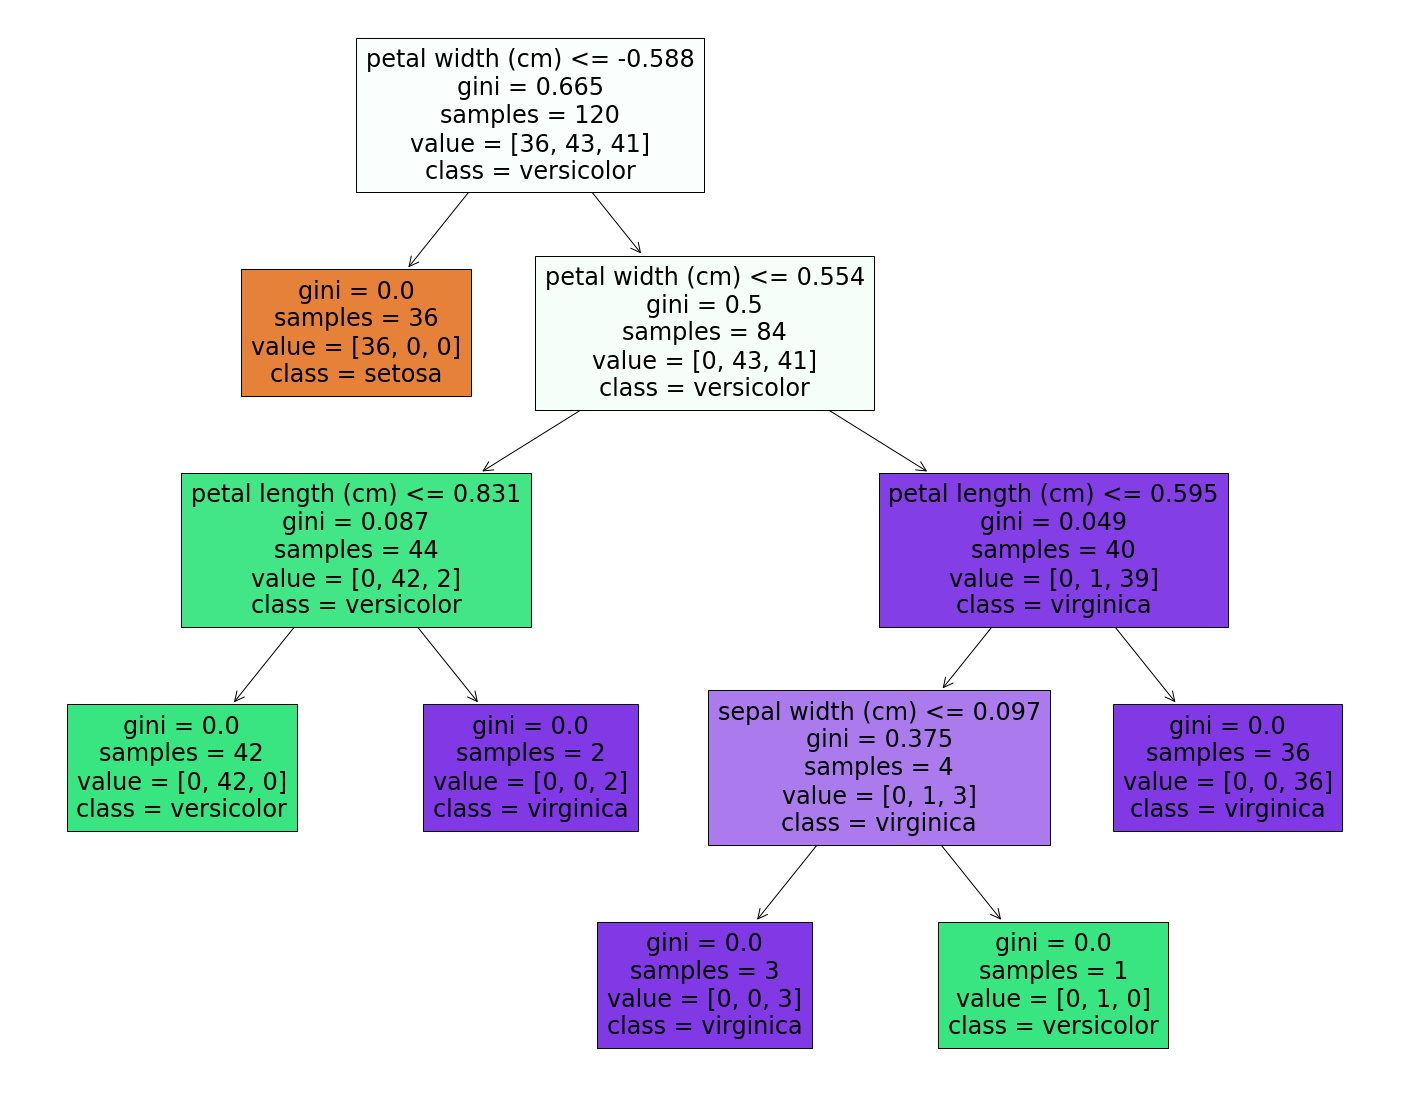

In [98]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

## Self-Study Tasks

1. Watch Decision Tree videos of StatQuest
2. Search and understand what is Information Gain, Entropy and Gini Impurity
3. Checkout documentation of all the python packages, classes and methods used in this code
4. Study about Support Vector Machine, Naive Bayes and Random Forest Classifiers and apply them to this dataset.
5. Read about what is class imbalance and how to overcome it.
6. Read about Cross-Validation.
7. Watch StatQuest videos on Underfitting and Overfitting.
8. Read about F1_Score and ROC_AUC Score, and their importance in classification
10. Train Decision Tree on Online Shoppers Purchasing Intention Dataset
11. Read about PCA from Python Data Science Handbook - https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

# Online Shoppers Purchasing Intent Dataset